# Explore fault data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py 
import cv2
import os

# Visualize 3d data

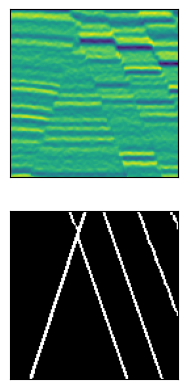

In [5]:
ids = 2
slice_id = 101
with h5py.File(f'/home/zhangzr/FaultRecongnition/Fault_data/hdf5/val/{ids}.h5', 'r') as f:
    seis = f['raw'][:]
    gt = f['label'][:][0,:,:,:]

plt.subplot(2,1,1)
fig = plt.imshow(seis[:,slice_id,:])
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(1-gt[:,slice_id,:], cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()

# Visualize 2d data

In [6]:
data_root_dir = '/home/zhangzr/FaultRecongnition/Fault_data/2d-simulate-data'
# pred_root_dir = '/home/zhangzr/FaultRecongnition/mmsegmentation-master/test_results/upernet_swin_base_patch4_window7_128x128_less_aug'
split = 'val'
seis = cv2.imread(os.path.join(data_root_dir, split, 'image', f'cube_{ids}_slice_{slice_id}.png'), cv2.IMREAD_UNCHANGED)
gt = cv2.imread(os.path.join(data_root_dir, split, 'ann', f'cube_{ids}_slice_{slice_id}.png'), cv2.IMREAD_UNCHANGED)
# pred = cv2.imread(os.path.join(pred_root_dir, f'cube_{cube_id}_slice_{slice_id}.png'), cv2.IMREAD_UNCHANGED)

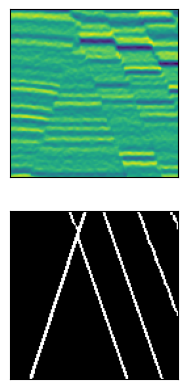

In [7]:
plt.subplot(2,1,1)
fig = plt.imshow(seis)
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.subplot(2,1,2)
fig = plt.imshow(1-gt, cmap='binary')
fig.axes.xaxis.set_visible(False)
fig.axes.yaxis.set_visible(False)
plt.show()